In [20]:
import pandas as pd
import sqlite3

# creating file path
dbfile ='data/results_lea38.db'

# Create a SQL connection to our SQLite database
conn = sqlite3.connect(dbfile)

# Define your SQL query
table_name = 'predictions'
id = 'be58d7'
query = "SELECT * FROM " + table_name + " WHERE id = '" + id + "'"

# Execute the query and store the results in a DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
df


,id,idx,pm,stator_yoke,stator_tooth,stator_winding,pm_gtruth,stator_yoke_gtruth,stator_tooth_gtruth,stator_winding_gtruth
0,be58d7,0,30.914391,0.0,0.0,0.0,26.037928,0.0,0.0,0.0
1,be58d7,1,31.106680,0.0,0.0,0.0,26.171842,0.0,0.0,0.0
2,be58d7,2,31.266781,0.0,0.0,0.0,25.995341,0.0,0.0,0.0
3,be58d7,3,31.395410,0.0,0.0,0.0,25.900134,0.0,0.0,0.0
4,be58d7,4,31.504223,0.0,0.0,0.0,25.862152,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
55388,be58d7,55388,68.370396,0.0,0.0,0.0,69.832955,0.0,0.0,0.0
55389,be58d7,55389,68.361714,0.0,0.0,0.0,69.831336,0.0,0.0,0.0
55390,be58d7,55390,68.359430,0.0,0.0,0.0,69.826378,0.0,0.0,0.0
55391,be58d7,55391,68.352221,0.0,0.0,0.0,69.828263,0.0,0.0,0.0


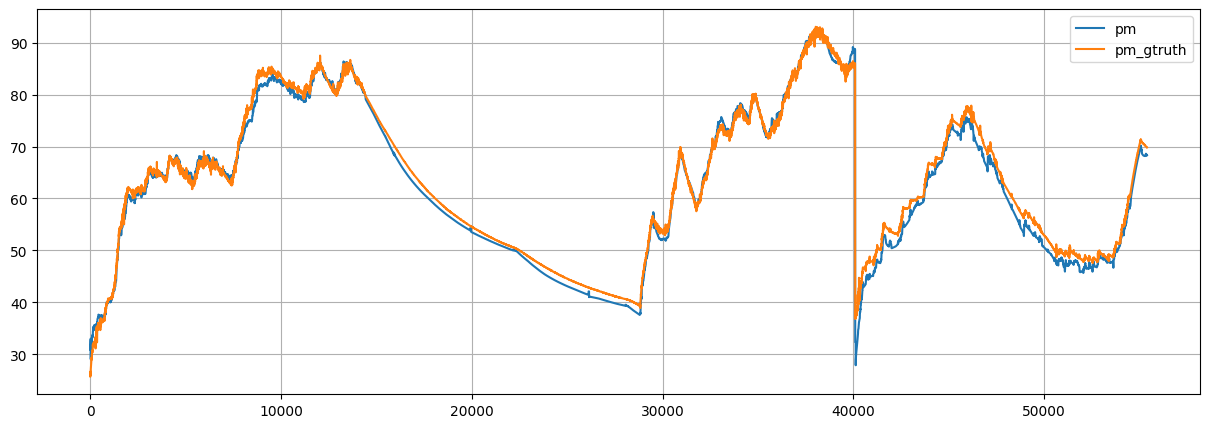

In [21]:
import matplotlib.pyplot as plt	

import matplotlib.pyplot as plt

# Plot pm and pm_gtruth over time
plt.plot(df['idx'], df['pm'], label='pm')
plt.plot(df['idx'], df['pm_gtruth'], label='pm_gtruth')

# Add legend
plt.legend()

# Add gridlines
plt.grid(True)

# Set size
plt.rcParams["figure.figsize"] = (15,5)

# Show the plot
plt.show()
